In [3]:
#Imports
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import hvplot.pandas
import numpy as np
import pypfopt

In [4]:
#Download Daily Price Data for 
    #META, AMAZON, (Palmy)
    #MICROSOFT, ALPHABET (matt)
    #APPLE & NDX 100 (Josh)

# Define the stock symbol
stock_symbol_aapl = "AAPL"  # Change this to the desired stock symbol
stock_symbol_ndx = "NDX"  # Change this to the desired stock symbol
stock_symbol_msft = "MSFT"  # Change this to the desired stock symbol
stock_symbol_goog = "GOOG"  # Change this to the desired stock symbol
stock_symbol_meta = "META"  # Change this to the desired stock symbol
stock_symbol_amzn = "AMZN"  # Change this to the desired stock symbol
index_symbol_sp = "^GSPC"
index_symbol_us10 = "^TNX"
# Calculate the start and end dates for the past 10 years
end_date = datetime.today().date()
start_date = end_date - timedelta(days=10*365)  # 10 years * 365 days

# Fetch historical price data
stock_data_aapl = yf.download(stock_symbol_aapl, start=start_date, end=end_date)
stock_data_ndx = yf.download(stock_symbol_ndx, start=start_date, end=end_date)
stock_data_msft = yf.download(stock_symbol_msft, start=start_date, end=end_date)
stock_data_goog = yf.download(stock_symbol_goog, start=start_date, end=end_date)
stock_data_meta = yf.download(stock_symbol_meta, start=start_date, end=end_date)
stock_data_amzn = yf.download(stock_symbol_amzn, start=start_date, end=end_date)
index_data_sp = yf.download(index_symbol_sp, start=start_date, end=end_date)
index_data_us10 = yf.download(index_symbol_us10, start=start_date, end=end_date)
# Print the retrieved data
stock_data_aapl
stock_data_ndx
stock_data_msft
stock_data_goog
stock_data_meta
stock_data_amzn
index_data_sp
index_data_us10

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-08-19,2.846,2.899,2.836,2.884,2.884,0
2013-08-20,2.811,2.838,2.811,2.814,2.814,0
2013-08-21,2.818,2.884,2.811,2.855,2.855,0
2013-08-22,2.916,2.920,2.873,2.901,2.901,0
2013-08-23,2.910,2.916,2.804,2.818,2.818,0
...,...,...,...,...,...,...
2023-08-10,3.982,4.094,3.957,4.080,4.080,0
2023-08-11,4.107,4.168,4.090,4.168,4.168,0
2023-08-14,4.176,4.215,4.146,4.184,4.184,0


In [5]:
#Print nulls
print(stock_data_aapl.isnull().sum())
print(stock_data_ndx.isnull().sum())
print(stock_data_msft.isnull().sum())
print(stock_data_goog.isnull().sum())
print(stock_data_meta.isnull().sum())
print(stock_data_amzn.isnull().sum())
print(index_data_sp.isnull().sum())
print(index_data_us10.isnull().sum())
#drop columns from data
stock_data_aapl = stock_data_aapl.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])
stock_data_ndx = stock_data_ndx.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])
stock_data_msft = stock_data_msft.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])
stock_data_goog = stock_data_goog.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])
stock_data_meta = stock_data_meta.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])
stock_data_amzn = stock_data_amzn.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])
index_data_sp = index_data_sp.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])
index_data_us10 = index_data_us10.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
#Generate Daily returns
combined_prices = pd.concat([stock_data_aapl, stock_data_ndx, stock_data_msft,stock_data_goog,stock_data_meta,stock_data_amzn, index_data_sp, index_data_us10], axis="columns", join="inner")
combined_prices.columns = ['aapl','ndx','msft','goog','meta','amzn','sp500', 'rfr']
combined_prices

,aapl,ndx,msft,goog,meta,amzn,sp500,rfr
Date,,,,,,,,
2013-08-19,15.826096,3069.760010,26.286446,21.560436,37.810001,14.278500,1646.060059,2.884
2013-08-20,15.618194,3082.169922,26.479055,21.554708,38.410000,14.354500,1652.349976,2.814
2013-08-21,15.658404,3071.469971,26.470680,21.652094,38.320000,14.228500,1642.800049,2.855
2013-08-22,15.677103,3101.820068,27.123863,21.761185,38.549999,14.486500,1656.959961,2.901
2013-08-23,15.616633,3124.270020,29.100157,21.674009,40.549999,14.500500,1663.500000,2.818
...,...,...,...,...,...,...,...,...
2023-08-10,177.729996,15128.839844,322.247711,130.210007,305.739990,138.559998,4468.830078,4.080
2023-08-11,177.789993,15028.070312,320.331787,130.169998,301.640015,138.410004,4464.049805,4.168
2023-08-14,179.460007,15205.589844,323.355408,131.830002,306.190002,140.570007,4489.720215,4.184


In [7]:
#Drop Nulls
combined_returns = combined_prices.pct_change()
combined_returns.dropna()


,aapl,ndx,msft,goog,meta,amzn,sp500,rfr
Date,,,,,,,,
2013-08-20,-0.013137,0.004043,0.007327,-0.000266,0.015869,0.005323,0.003821,-0.024272
2013-08-21,0.002575,-0.003472,-0.000316,0.004518,-0.002343,-0.008778,-0.005780,0.014570
2013-08-22,0.001194,0.009881,0.024676,0.005038,0.006002,0.018133,0.008619,0.016112
2013-08-23,-0.003857,0.007238,0.072862,-0.004006,0.051881,0.000966,0.003947,-0.028611
2013-08-26,0.003892,-0.000512,-0.017266,-0.004390,0.019482,-0.013103,-0.004040,-0.004613
...,...,...,...,...,...,...,...,...
2023-08-10,-0.001235,0.001796,0.002172,0.000461,0.001737,0.005150,0.000251,0.016949
2023-08-11,0.000338,-0.006661,-0.005946,-0.000307,-0.013410,-0.001083,-0.001070,0.021569
2023-08-14,0.009393,0.011813,0.009439,0.012753,0.015084,0.015606,0.005750,0.003839


In [8]:
# Plot Daily returns on hvplot.line
combined_returns.hvplot(
    x='Date',   
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [9]:
# Calculate cumulative returns of all portfolios
cum_returns = (1 + combined_returns).cumprod(axis=0)
cum_returns

# Plot cumulative returns
cum_returns.hvplot(
    width=1000,
    height=500
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [10]:
#Calculate varience
portfolio_variance = combined_returns.var()
portfolio_variance


aapl     0.000323
ndx      0.000186
msft     0.000295
goog     0.000310
meta     0.000568
amzn     0.000436
sp500    0.000124
rfr      0.000985
dtype: float64

In [11]:
# Calculate the annualized `std`
portfolio_std = combined_returns.std() * np.sqrt(252)
portfolio_std

aapl     0.285172
ndx      0.216305
msft     0.272466
goog     0.279408
meta     0.378418
amzn     0.331600
sp500    0.176954
rfr      0.498091
dtype: float64

In [12]:
#Find covariance of stocks with S&P 500
covariance_aapl = combined_returns['aapl'].cov(combined_returns['sp500'])
covariance_ndx = combined_returns['ndx'].cov(combined_returns['sp500'])
covariance_msft = combined_returns['msft'].cov(combined_returns['sp500'])
covariance_goog = combined_returns['goog'].cov(combined_returns['sp500'])
covariance_meta = combined_returns['meta'].cov(combined_returns['sp500'])
covariance_amzn = combined_returns['amzn'].cov(combined_returns['sp500'])

#Find variance of S&P 500
variance_sp = combined_returns['sp500'].var()
variance_sp

0.00012425640576875166

In [13]:
#Obtain the covariance of each stock
beta_aapl = covariance_aapl/variance_sp
beta_ndx = covariance_ndx/variance_sp
beta_msft = covariance_msft/variance_sp
beta_goog = covariance_goog/variance_sp
beta_meta = covariance_meta/variance_sp
beta_amzn = covariance_amzn/variance_sp


In [14]:
#Calculate Sharpe ratios
sharpe_ratios = ((combined_returns.mean()-combined_returns['rfr'].mean()) * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios

aapl     0.428812
ndx      0.098919
msft     0.468142
goog     0.207532
meta     0.311792
amzn     0.361401
sp500   -0.259615
rfr      0.000000
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

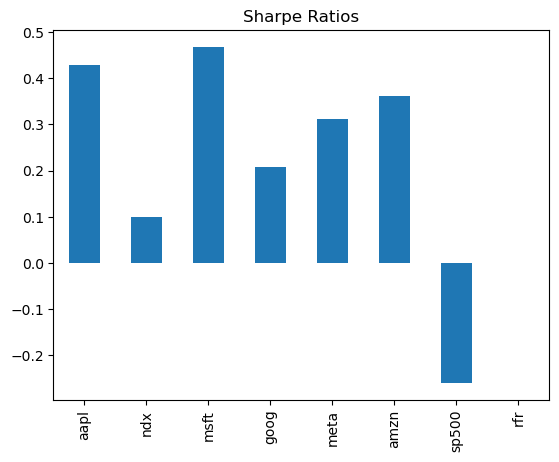

In [15]:
#Plot Sharpe ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [24]:
cov_matrix = np.cov(combined_returns, bias=True)
cov_matrix

array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,  1.40792834e-04, -6.38560453e-05, ...,
         3.18595259e-05, -6.80741077e-05, -9.37055508e-05],
       [            nan, -6.38560453e-05,  4.59128884e-05, ...,
        -1.52521903e-05,  4.71011599e-05,  4.87638255e-05],
       ...,
       [            nan,  3.18595259e-05, -1.52521903e-05, ...,
         1.53936527e-05, -2.47039805e-05, -3.30151011e-05],
       [            nan, -6.80741077e-05,  4.71011599e-05, ...,
        -2.47039805e-05,  6.26723491e-05,  6.47970407e-05],
       [            nan, -9.37055508e-05,  4.87638255e-05, ...,
        -3.30151011e-05,  6.47970407e-05,  9.31705519e-05]])